In [30]:
from google.colab import files
import io
import json
import numpy as np
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [31]:
data = pd.read_csv('/content/result.csv')

In [32]:
data = data.dropna()

In [33]:
df = data
df

,color,fuelTypeId,fuelType,id,km,make,makeId,model,modelId,price,...,year,brand,brand_id,fuel_types,model_id,seller_type,bodyType,cubicCapacity,doors,hp
0,COMMON.COLOR_WHITE,2,Gasolina,51040978,41080,TOYOTA,46,Yaris,322.0,10990,...,2015,TOYOTA,46,Gasolina,322.0,profesional,BODY_TYPE_SEDAN,1329.0,5.0,99.0
1,COMMON.COLOR_BLACK,1,Diesel,50914675,78576,VOLVO,48,V40,285.0,17450,...,2016,VOLVO,48,Diesel,285.0,profesional,BODY_TYPE_SEDAN,1969.0,5.0,120.0
2,COMMON.COLOR_BLACK,1,Diesel,50573084,99999,BMW,7,Serie 3,70.0,20999,...,2015,BMW,7,Diesel,70.0,particular,BODY_TYPE_FAMILIAR,1995.0,5.0,184.0
3,COMMON.COLOR_BROWN,4,Hibrido,51265506,79000,FORD,15,Mondeo,39.0,19990,...,2016,FORD,15,Hibrido,39.0,profesional,BODY_TYPE_SEDAN,1999.0,4.0,187.0
4,COMMON.COLOR_WHITE,1,Diesel,50433156,105000,MERCEDES-BENZ,28,Clase C,8.0,31900,...,2016,MERCEDES-BENZ,28,Diesel,8.0,particular,BODY_TYPE_SEDAN,2143.0,4.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,COMMON.COLOR_GRAY,1,Diesel,51304363,182000,PORSCHE,34,Cayenne,503.0,26500,...,2010,PORSCHE,34,Diesel,503.0,profesional,BODY_TYPE_4X4,2967.0,5.0,240.0
3033,COMMON.COLOR_GRAY,1,Diesel,51053592,99000,PORSCHE,34,Macan,1097.0,49990,...,2017,PORSCHE,34,Diesel,1097.0,profesional,BODY_TYPE_4X4,2967.0,5.0,258.0
3034,COMMON.COLOR_WHITE,2,Gasolina,50921778,59900,PORSCHE,34,Macan,1097.0,50900,...,2014,PORSCHE,34,Gasolina,1097.0,profesional,BODY_TYPE_4X4,2997.0,5.0,340.0
3035,COMMON.COLOR_WHITE,1,Diesel,50667722,99999,PORSCHE,34,Macan,1097.0,51900,...,2016,PORSCHE,34,Diesel,1097.0,profesional,BODY_TYPE_4X4,2967.0,5.0,258.0


In [34]:
df = df.drop(['id','provinceId', 'brand_id', 'model_id', 'color', 'fuelType', 'make', 'model', 'province', 'title', 'transmissionType', 'brand', 'fuel_types', 'seller_type', 'bodyType'], axis=1)

In [35]:
df.head(3).T

,0,1,2
fuelTypeId,2.0,1.0,1.0
km,41080.0,78576.0,99999.0
makeId,46.0,48.0,7.0
modelId,322.0,285.0,70.0
price,10990.0,17450.0,20999.0
transmissionTypeId,2.0,2.0,1.0
year,2015.0,2016.0,2015.0
cubicCapacity,1329.0,1969.0,1995.0
doors,5.0,5.0,5.0
hp,99.0,120.0,184.0


In [36]:
x_df = df.drop('price', axis=1)
y_df = df['price']
# separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = 1, test_size=0.20)
df.head(2).T

,0,1
fuelTypeId,2.0,1.0
km,41080.0,78576.0
makeId,46.0,48.0
modelId,322.0,285.0
price,10990.0,17450.0
transmissionTypeId,2.0,2.0
year,2015.0,2016.0
cubicCapacity,1329.0,1969.0
doors,5.0,5.0
hp,99.0,120.0


In [37]:
y_train

2596    31900
1825    18950
2068    10900
2264    32890
607      9999
        ...  
2781    21490
908     23500
1101    12999
235     10700
1066    18450
Name: price, Length: 2415, dtype: int64

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
y_predict = model.predict(x_test)

In [40]:
y_predict

array([  8513.8427752 ,  21919.62591106,   9731.99116401,  23375.09984788,
         4896.70441849,  24988.21449309,  14422.79125251,  25569.39806393,
        23988.24973248,  24426.79329408,  25413.12619543,  62192.13231074,
        19173.21153923,    604.90238193,  28493.0930631 ,  24416.03676407,
        10705.62434833,   7459.47682216,  19052.47977834,  28254.12189791,
        25914.39975016,   8526.2042802 ,   -101.53776994,  24906.06662442,
        19743.68492448,  37521.24917679,  16621.32846785,  33407.67456069,
        26100.55303307,  41466.54584544,  15203.45572981,  32841.04484398,
         8650.06815901,  26691.54338468,  14326.95965383,  39694.03682214,
        22867.76682411,  14696.89175313,  22042.72279648,  14637.84123645,
        23486.67710964,  13529.74199754,  20967.88456182,  26008.52847172,
        72604.6598766 ,  22558.48629522,   1910.78579016,  20300.77936457,
        26909.95484948,  27556.84781598,   1773.50543556,  11940.97729077,
        26379.06006102,  

In [41]:
y_test

1708     9900
1770    20990
2734    13999
2749    24990
1147     9400
        ...  
2041    17990
1092    25890
858     35690
2007    10200
1170     8350
Name: price, Length: 604, dtype: int64

In [42]:
score = model.score(x_train, y_train)

In [43]:
score

0.7973699211468492

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


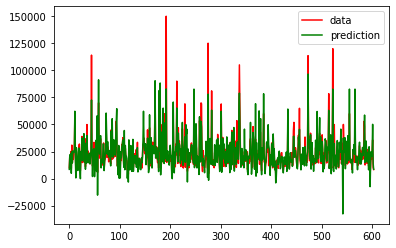

In [44]:
# representacion grafica
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_predict, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.show()

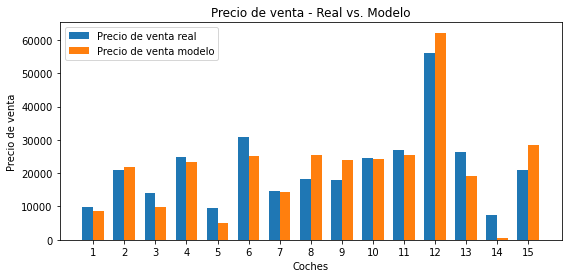

In [23]:
ind = np.arange(15)
width = 0.35
plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:15], width, label='Precio de venta real')
plt.bar(ind+width, y_predict[:15], width, label='Precio de venta modelo')
plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')
plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()

Aquí se exporta e importan los modelos

In [45]:
import joblib

In [47]:
joblib.dump(model, "modelo1.joblib")

['modelo1.joblib']

In [26]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("./modelo1.joblib")

In [27]:
X = loaded_rf.predict(x_df)

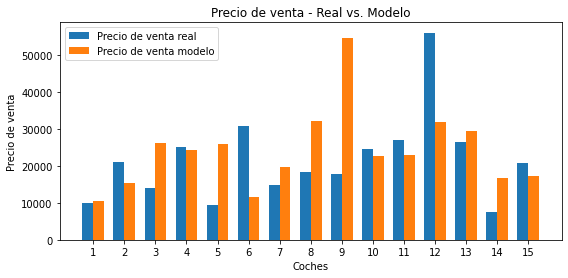

In [28]:
ind = np.arange(15)
width = 0.35
plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:15], width, label='Precio de venta real')
plt.bar(ind+width, X[:15], width, label='Precio de venta modelo')
plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')
plt.xlabel('Coches')
plt.ylabel('Precio de venta')
plt.title('Precio de venta - Real vs. Modelo')

plt.show()